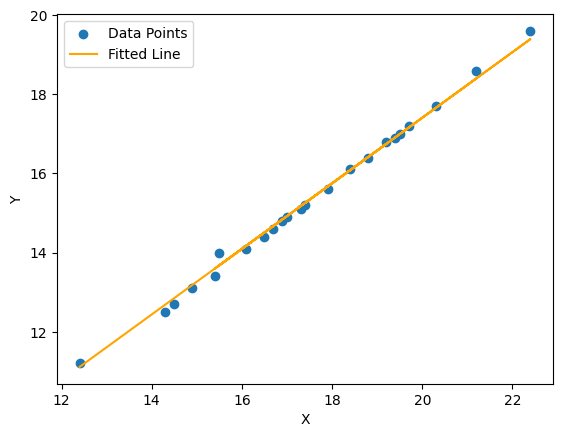

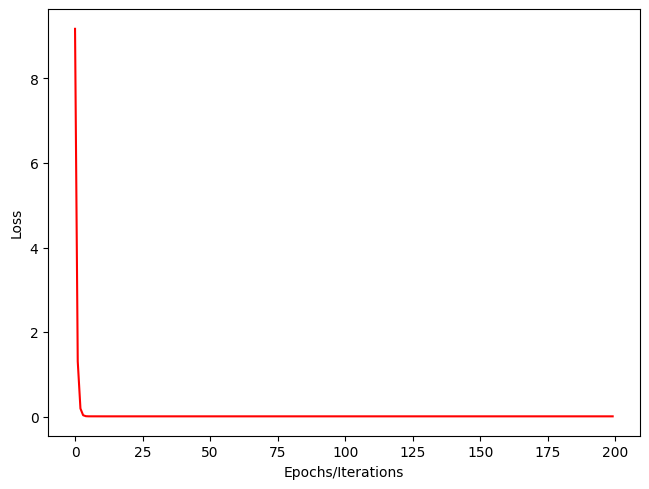

Learned weight (w): 0.828348696231842
Learned bias (b): 0.8399612903594971


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

X = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]).view(-1, 1)  # Reshape for NN input
Y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6]).view(-1, 1)  # Reshape for NN output

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Linear model: y = wx + b

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_list = []

for epoch in range(200):
    model.train()

    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    loss_list.append(loss.item())

Y_pred_final = model(X).detach()

plt.scatter(X.numpy(), Y.numpy(), label='Data Points')
plt.plot(X.numpy(), Y_pred_final.numpy(), color='orange', label='Fitted Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

plt.plot(loss_list, 'r')
plt.tight_layout()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

print("Learned weight (w):", model.linear.weight.item())
print("Learned bias (b):", model.linear.bias.item())